In [5]:
import pylab
import numpy as np
import math
import matplotlib.pyplot as plt
#M = 10^11 M_solar
#[M] = 5*10^10 M_solar
M = 2
#L = 25 kpc
#[L] = 3.5kpc
R_p = 7.1429 #pericenter
R_a = 28.5714 #apocenter

v_in = 0.08832165482283452 #inital velocity @ the apocenter
#v_in = 0.06
#v_in = 0.05
#v_in = 0.0
#[T] = 10^8
def generate_ring(r,N):
    # Generates each ring
    ring = np.ones((N,3))
    vel = np.ones((N,3))
    v = np.sqrt(M/r)
    for i in range(N):
        ring[i,0] = r*np.cos((2*np.pi*i)/N)
        ring[i,1] = r*np.sin((2*np.pi*i)/N)
        ring[i,2] = 0 
        vel[i,0] = -v*np.sin((2*np.pi*i)/N)
        vel[i,1] = v*np.cos((2*np.pi*i)/N)
#         vel[i,0] = v*np.sin(np.pi/4)
#         vel[i,1] = v*np.cos(np.pi/4)
        vel[i,2] = 0

    return ring,vel

def generate_mice(N,r):
    #Generates the core with the test particles
    disk = np.array([[0.0,0.0,0.0]])
    o_v = np.array([[0.0,0.0,0.0]])
    for i in range(11):
        x,v = generate_ring((0.2 + 0.05*i)*r, (12 + 3*i))
#         x,v = generate_ring((0.2 + 0.05*i)*r, 297)
        o_v = np.append(o_v,v,axis=0)   
        disk  = np.append(disk,x,axis=0)   
        
    return disk,o_v

[[ 6.123234e-17  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17]]


<ipython-input-6-e3ec5d72a433>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


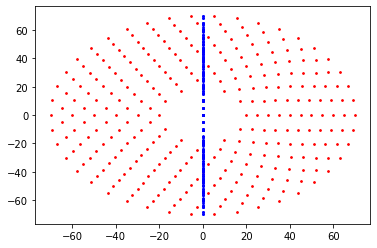

In [6]:
gal, vel = generate_mice(297,100)
R = rot_mat(90.0, [0.0,1.0,0.0])
print(R)
mod_disk = np.array([np.matmul(R,gal[i,:]) for i in range(298)])
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(gal[:,0],gal[:,1],fc='r', s = 3)
ax2 = fig.add_subplot()
ax2.scatter(mod_disk[:,0],mod_disk[:,1], fc='b', s = 3)

In [14]:
def rot_mat(deg, n):
    # Rotates matrices 
   
    ang = np.pi/180.0 * deg
    print(ang)
    a = 1 - np.cos(ang)
    s = np.sin(ang)
    c = np.cos(ang)
    R = np.zeros((3,3))
    R[0,0] = a*n[0]**2 + c
    R[0,1] = a*n[0]*n[1] - s*n[2]
    R[0,2] = a*n[0]*n[2] + s*n[1]
    R[1,0] = a*n[0]*n[1] + s*n[2]
    R[1,1] = a*n[1]**2 + c
    R[1,2] = a*n[1]*n[2] - s*n[0]
    R[2,0] = a*n[0]*n[2] - s*n[1]
    R[2,1] = a*n[1]*n[2] + s*n[0]
    R[2,2] = a*n[2]**2 + c
    
    return R   

In [15]:
rot_mat(-30.0,[0.0,0.0,1.0])

-0.5235987755982988


array([[ 0.8660254,  0.5      ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [7]:
def mice_init(r):
    #Combines both galaxies onto one plane with the right parameters
    w = -90
    n1 = [0.0,0.0,1.0]
    i_a = -15
    n2 = [1.0,0.0,0.0]
    i_b = -60
    g_pos, g_vel = generate_mice(297,20)
    R = rot_mat(w, n1)
    Ra = rot_mat(i_a, n2)
    Rb = rot_mat(i_b, n2)
    gal_a = np.array([np.matmul(Ra, np.matmul(R,g_pos[i,:])) for i in range(298)]) + [0.0,r,0.0] 
    va = np.array([np.matmul(Ra, np.matmul(R,g_vel[i,:])) for i in range(298)]) + [-v_in, 0.0, 0.0]
    g_pos, g_vel = generate_mice(297,20)
    gal_b = np.array([np.matmul(Rb, np.matmul(R,g_pos[i,:])) for i in range(298)]) - [0.0,r,0.0]
    vb = np.array([np.matmul(Rb, np.matmul(R,g_vel[i,:])) for i in range(298)]) + [v_in, 0.0, 0.0]
    fig = plt.figure(figsize =[10, 10])
    ax = fig.add_subplot()
    ax.scatter(gal_a[:,0],gal_a[:,1], fc='b', s = 3)
    ax.scatter(gal_b[:,0],gal_b[:,1], fc='r', s = 3)
    ax.set_xlim([-40,40])
    ax.set_ylim([-80,80])
    gal = np.append(gal_a, gal_b, axis=0)
    all_v = np.append(va, vb,axis=0)
    return (gal, all_v) 
    plt.show()

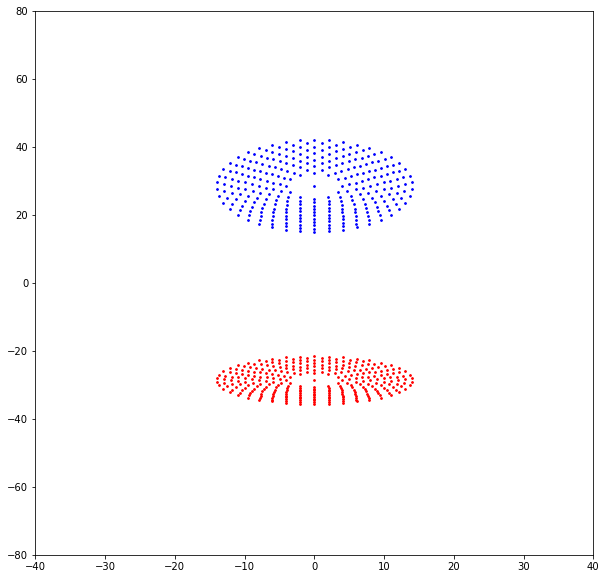

In [8]:
x, v= mice_init(R_a)

np.savetxt('init.out',np.c_[np.around(x[:,0],3), np.around(x[:,1],3), np.around(x[:,2],3), np.around(v[:,0],3) ,np.around(v[:,1],3) ,np.around(v[:,2],3)], fmt='%.3f') 